In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
df = pd.read_csv('UpdatedResumeDataSet.csv')

In [ ]:
df.head()

,Category,Resume
0,Data Science,Skills * Programming Languages: Python (pandas...
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...
2,Data Science,"Areas of Interest Deep Learning, Control Syste..."
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...
4,Data Science,"Education Details \r\n MCA YMCAUST, Faridab..."


In [ ]:
df.shape

(962, 2)

# Exploring Categories

In [7]:
df['Category'].value_counts()

Category
Java Developer               84
Testing                      70
DevOps Engineer              55
Python Developer             48
Web Designing                45
HR                           44
Hadoop                       42
Sales                        40
Data Science                 40
Mechanical Engineer          40
ETL Developer                40
Blockchain                   40
Operations Manager           40
Arts                         36
Database                     33
Health and fitness           30
PMO                          30
Electrical Engineering       30
Business Analyst             28
DotNet Developer             28
Automation Testing           26
Network Security Engineer    25
Civil Engineer               24
SAP Developer                24
Advocate                     20
Name: count, dtype: int64

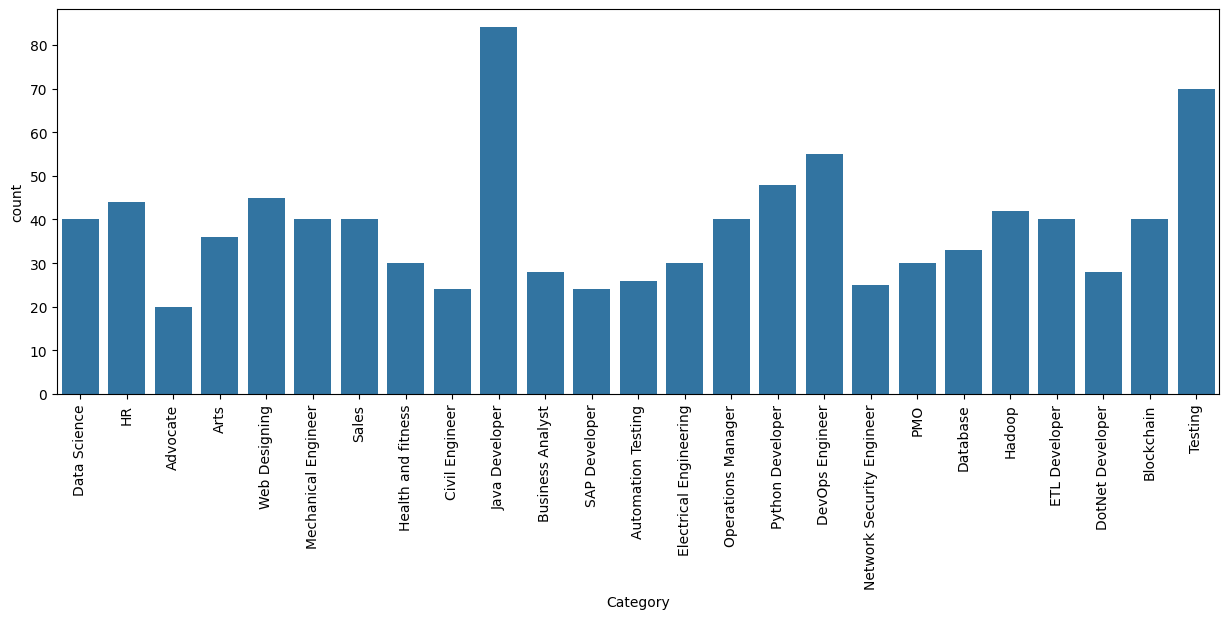

In [14]:
plt.figure(figsize=(15,5))
sns.countplot(x="Category", data = df)
plt.xticks(rotation = 90)
plt.show()

In [16]:
df['Category'].unique()

array(['Data Science', 'HR', 'Advocate', 'Arts', 'Web Designing',
       'Mechanical Engineer', 'Sales', 'Health and fitness',
       'Civil Engineer', 'Java Developer', 'Business Analyst',
       'SAP Developer', 'Automation Testing', 'Electrical Engineering',
       'Operations Manager', 'Python Developer', 'DevOps Engineer',
       'Network Security Engineer', 'PMO', 'Database', 'Hadoop',
       'ETL Developer', 'DotNet Developer', 'Blockchain', 'Testing'],
      dtype=object)

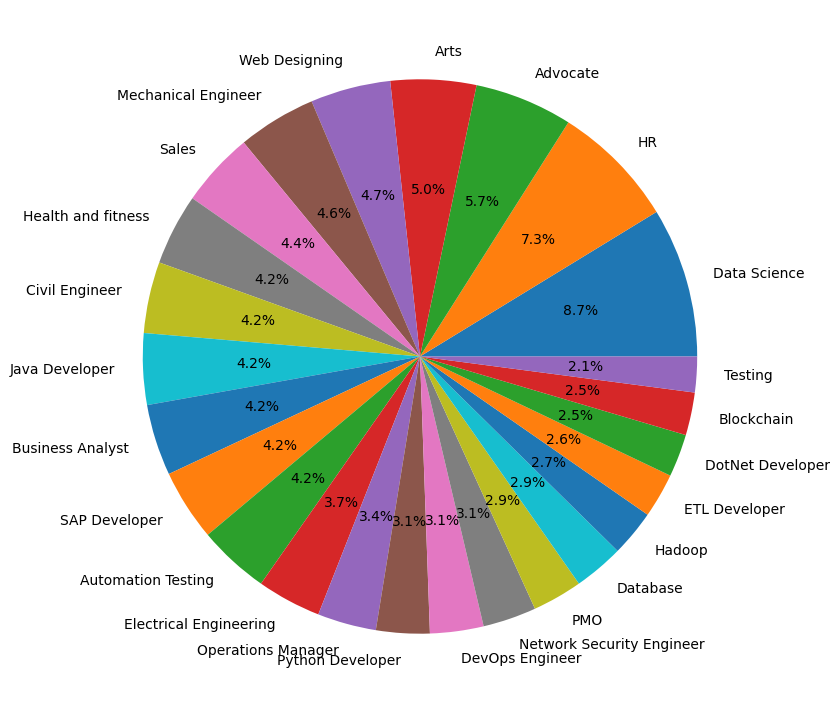

In [ ]:
counts = df['Category'].value_counts()
labels = df['Category'].unique()
plt.figure(figsize=(15,9))

plt.pie(counts,labels=labels,autopct='%1.1f%%') 
plt.show()

# Exploring Resume

In [34]:
df['Category'][0]

'Data Science'

In [37]:
df['Resume'][0]

'Skills * Programming Languages: Python (pandas, numpy, scipy, scikit-learn, matplotlib), Sql, Java, JavaScript/JQuery. * Machine learning: Regression, SVM, NaÃ¯ve Bayes, KNN, Random Forest, Decision Trees, Boosting techniques, Cluster Analysis, Word Embedding, Sentiment Analysis, Natural Language processing, Dimensionality reduction, Topic Modelling (LDA, NMF), PCA & Neural Nets. * Database Visualizations: Mysql, SqlServer, Cassandra, Hbase, ElasticSearch D3.js, DC.js, Plotly, kibana, matplotlib, ggplot, Tableau. * Others: Regular Expression, HTML, CSS, Angular 6, Logstash, Kafka, Python Flask, Git, Docker, computer vision - Open CV and understanding of Deep learning.Education Details \r\n\r\nData Science Assurance Associate \r\n\r\nData Science Assurance Associate - Ernst & Young LLP\r\nSkill Details \r\nJAVASCRIPT- Exprience - 24 months\r\njQuery- Exprience - 24 months\r\nPython- Exprience - 24 monthsCompany Details \r\ncompany - Ernst & Young LLP\r\ndescription - Fraud Investigatio

# Cleaning Data
1 URLs,                                                
2 hashtags,                                             
3 mentions,                                                     
4 special letters,                                             
5 punctuations:  

In [41]:
import re

def cleanResume(txt):
    cleanText = re.sub(r'http\S+\s', ' ', txt)  
    cleanText = re.sub(r'RT|cc', ' ', cleanText)
    cleanText = re.sub(r'#\S+\s', ' ', cleanText)
    cleanText = re.sub(r'@\S+', '  ', cleanText)
    cleanText = re.sub(r'[!"#$%&\'()*+,-./:;<=>?\[\]^_`{|}~]', ' ', cleanText)  # Fixed line
    cleanText = re.sub(r'[^\x00-\x7f]', ' ', cleanText)
    cleanText = re.sub(r'\s+', ' ', cleanText)
    return cleanText


In [42]:
df['Resume'] = df['Resume'].apply(lambda x: cleanResume(x))

In [43]:
df['Resume'][0]

'Skills Programming Languages Python pandas numpy scipy scikit learn matplotlib Sql Java JavaScript JQuery Machine learning Regression SVM Na ve Bayes KNN Random Forest Decision Trees Boosting techniques Cluster Analysis Word Embedding Sentiment Analysis Natural Language processing Dimensionality reduction Topic Modelling LDA NMF PCA Neural Nets Database Visualizations Mysql SqlServer Cassandra Hbase ElasticSearch D3 js DC js Plotly kibana matplotlib ggplot Tableau Others Regular Expression HTML CSS Angular 6 Logstash Kafka Python Flask Git Docker computer vision Open CV and understanding of Deep learning Education Details Data Science Assurance Associate Data Science Assurance Associate Ernst Young LLP Skill Details JAVASCRIPT Exprience 24 months jQuery Exprience 24 months Python Exprience 24 monthsCompany Details company Ernst Young LLP description Fraud Investigations and Dispute Services Assurance TECHNOLOGY ASSISTED REVIEW TAR Technology Assisted Review assists in a elerating the 

# words into categorical values

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [45]:
le.fit(df['Category'])
df['Category'] = le.transform(df['Category'])

In [46]:
df.Category.unique()

array([ 6, 12,  0,  1, 24, 16, 22, 14,  5, 15,  4, 21,  2, 11, 18, 20,  8,
       17, 19,  7, 13, 10,  9,  3, 23])

# Vactorization

In [17]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(stop_words='english')

tfidf.fit(df['Resume'])
requiredText  = tfidf.transform(df['Resume'])

In [18]:
from sklearn.model_selection import train_test_split

In [19]:
X_train, X_test, y_train, y_test = train_test_split(requiredText, df['Category'], test_size=0.2, random_state=42)

In [53]:
X_train.shape

(769, 7351)

In [54]:
X_test.shape

(193, 7351)

# Now let’s train the model and print the classification report:

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.multiclass import OneVsRestClassifier #ensures multi-label support
from sklearn.metrics import accuracy_score

clf = OneVsRestClassifier(KNeighborsClassifier())
clf.fit(X_train,y_train)
ypred = clf.predict(X_test)
print(ypred)

[15 15 15 13 14 17 16  2  0 14 13 12 16 23 20  5  6  4 10  9 19  1 10 23
 23 21 22 22  2 12 18  1  8 24 11 23  7 12 24  8 18  6  8 19 24 23 21  1
 15  4 15 22 11  5 15 13  1 19  5 12 22 22 20 24 21 18 12 10 10 20 10  8
  9 21 17 21  0 17 16 14 15 11 11  8 20  3 19  8  0  2  9 10  2 23 20 20
 23 12 18 12  7 16  8 14 18  3 14 19 14 14 15 18  8  2 21 18 23 10 23  5
 11 15 12  3  5  3  7 12 19  8 20 19  3 15  9 19  1 23 21  5 20 15 16  7
  7  8 15 18  1 15 13 20  7  4 18 11  5 15  5 12  9 22 18 21  8 23  4 12
 24 16 15 22  8 22  3 16 23 23 12  7 16 18  5  3 18  8 23 23 20 21  6  7
 23]


In [56]:
print(accuracy_score(y_test,ypred))

0.9844559585492227


# Prediction System

In [57]:
import pickle
pickle.dump(tfidf,open('tfidf.pkl','wb'))
pickle.dump(clf, open('clf.pkl', 'wb'))


In [58]:
myresume = """I am Saidarshan Sahu, a final-year Computer Science & Engineering student at NIT Rourkela. I have a strong passion for technology and software development, with experience in programming languages like C++, Python, and JavaScript. Over the years, I have worked on various projects that have helped me enhance my problem-solving skills and gain hands-on experience in real-world applications.
Education
I am currently pursuing my B.Tech. in Computer Science & Engineering at NIT Rourkela (2021 - Present) and have maintained a CGPA of 6.77/10.
Before that, I completed my Intermediate education from Aaryan Gurukul Residential School, Brahmapur, in May 2021 with a percentage of 55%.
I did my Matriculation at Swamy Vivekananda Vidyamandir, Brahmapur, in May 2019, securing 51%.
DOB: 30 March 2004
Contact: +91 7205578024
Email: saidarshan.sahu04@gmail.com

My Skills
I have a strong technical background, with expertise in:
Programming Languages: C++, Python, JavaScript
Frameworks & Tools: React.js, HTML, CSS, SQL, Git, GitHub
Libraries: Numpy, Pandas, TensorFlow
Operating Systems: Windows, Linux
Languages Spoken: English, Hindi, Odia

Relevant Courses I Have Taken
Throughout my academic journey, I have explored various technical fields, including:
Machine Learning
SQL
Data Structures and Algorithms
Database Management Systems
Object-Oriented Programming
Computer Vision
Software Engineering

Projects I Have Worked On
Count Wheels (July 2024) - https://github.com/saidarshan20/Count-Wheels
I developed a real-time vehicle counting system using the SORT algorithm with OpenCV, achieving 95%" detection accuracy for various vehicles. I optimized the algorithm to maintain its accuracy across different lighting conditions, ensuring reliable and efficient vehicle tracking.

Google Search Clone (March 2024) - https://github.com/saidarshan20/google-clone
I built a Google Search clone using Next.js and the Google Custom Search JSON API. The project features real-time search results with pagination, ensuring a smooth user experience across devices. I also tackled API integration challenges, implementing secure and efficient API queries.

Quick Resume Scanner (September 2023) - https://github.com/saidarshan20/Quick-Resume-Scanner
I created an NLP-based resume scanning model using Python, Streamlit, and NLTK. The model automates resume categorization with 98%" accuracy and optimizes keyword extraction using TF-IDF. I improved the accuracy by 15%" and reduced variance by 4%" by integrating KNN into a multiclass classifier.

My Achievements
I participated in the HackOdisha Consumer Track Hackathon (September 2023), where I developed an NLP-based resume scanning model that achieved 98% accuracy in automated resume screening. This project helped me refine my skills in machine learning and natural language processing.

Extracurricular Activities
Beyond academics, I have been actively involved in various activities:
Technical Lead, Innovision (November 2023): I led the technical team for Innovision, managing designers, developers, and promotions to successfully organize a cultural event with 10,000+ attendees.
National Service Scheme (2021 - 2022): As a part of NSS, I participated in youth organization activities, focusing on character building, leadership, teamwork, and selfless service.
"""

In [ ]:
import pickle

# Load the trained classifier
clf = pickle.load(open('clf.pkl', 'rb'))

# Clean the input resume
cleaned_resume = cleanResume(myresume)

# Transform the cleaned resume using the trained TfidfVectorizer
input_features = tfidf.transform([cleaned_resume])

# Make the prediction using the loaded classifier
prediction_id = clf.predict(input_features)[0]

# Map category ID to name
category_mapping = {
    15: "Java Developer",
    23: "Testing",
    8: "DevOps Engineer",
    20: "Python Developer",
    24: "Web Designing",
    12: "HR",
    13: "Hadoop",
    3: "Blockchain",
    10: "ETL Developer",
    18: "Operations Manager",
    6: "Data Science",
    22: "Sales",
    16: "Mechanical Engineer",
    1: "Arts",
    7: "Database",
    11: "Electrical Engineering",
    14: "Health and fitness",
    19: "PMO",
    4: "Business Analyst",
    9: "DotNet Developer",
    2: "Automation Testing",
    17: "Network Security Engineer",
    21: "SAP Developer",
    5: "Civil Engineer",
    0: "Advocate",
}

category_name = category_mapping.get(prediction_id, "Unknown")

print("Predicted Category:", category_name)
print(prediction_id)

Predicted Category: Data Science
6
